## Lesson-01 Assignment-周振国

## 本次作业的内容

### 复现课堂代码

In [630]:
simple_grammar = '''
sentence = noun_phrase verb_phrase
noun_phrase = Article Adj* noun
Adj* = null | Adj Adj*
verb_phrase = verb noun_phrase
Article = 一个 | 这个 | 一位
noun = 女人 | 篮球 | 桌子 | 小猫
verb = 看着 | 坐在 | 听着 | 看见
Adj = 蓝色的 | 好看的 | 小小的
'''

In [631]:
def create_grammar(grammar_str, split='=', line_split='\n'): 
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [632]:
grammar = create_grammar(simple_grammar)

In [633]:
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [634]:
import random

In [636]:
choice = random.choice

def generate(gram, target):
    
    
    if target not in gram: return target
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])
   

In [637]:
example_grammar = create_grammar(simple_grammar)

In [638]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个'], ['一位']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [639]:
generate(gram=example_grammar, target='sentence')

'一位蓝色的篮球看着一个小小的好看的篮球'

In [640]:
#在西部世界里，一个人类的语言可以定义为：
human = '''
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们
寻找 = 找找 | 想找点
活动 = 乐子 | 玩的
'''

#一个接待员的语言可以定义为
host = '''
host = 寒暄 报数 询问 业务相关 结尾？
寒暄 = 称谓 打招呼 ！
称谓 = 人称 ，
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好
报数 = 我是 数字 号，
数字 = 单个数字 | 数字 单个数字
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
询问 = 请问你要 | 您需要
业务相关 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗
'''

In [641]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

女士，你好！我是39号，您需要打猎结尾？
小朋友，你好！我是62号，您需要打猎结尾？
小朋友，你好！我是848号，您需要打牌结尾？
先生，你好！我是4号，请问你要打牌结尾？
小朋友，您好！我是23554296号，请问你要喝酒结尾？
小朋友，您好！我是5号，您需要喝酒结尾？
小朋友，您好！我是8号，请问你要赌博结尾？
先生，你好！我是91号，您需要打牌结尾？
先生，您好！我是6号，您需要赌博结尾？
女士，您好！我是421号，您需要打牌结尾？
小朋友，你好！我是61号，您需要打牌结尾？
女士，您好！我是4号，您需要打牌结尾？
小朋友，您好！我是942号，请问你要喝酒结尾？
小朋友，你好！我是65号，请问你要打猎结尾？
先生，您好！我是4285号，请问你要打猎结尾？
先生，您好！我是5号，您需要打牌结尾？
先生，您好！我是51号，请问你要赌博结尾？
先生，你好！我是5号，请问你要赌博结尾？
先生，您好！我是1号，您需要打牌结尾？
先生，你好！我是91号，您需要打猎结尾？


In [642]:
simple_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_ling stmt change_line }
if_stmt => if ( cond ) { change_line stmt change_line } | if ( cond ) { change_line stmt change_line } else { change_line stmt change_line }
change_line => /N
cond => var op var
op => | == | < | >=  | <=
stmt => assign | if_stmt
assign => var = var
var => var _ num | words
words => words _ word | word
word => name | info | student | lib | database
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8| 9 | 0
nums => nums num | num
'''


In [643]:
print(generate(gram=create_grammar(simple_programming, split='=>'), target='programming'))

while(database_database>=name_database_lib){change_lingif(name_lib_lib==info){/Nif(info_student<name_database_4_0_0_1_1){/Nname_name_lib_student_name=info/N}else{/Nstudent_8=lib_9/N}/N}else{/Nif(student_name_8database_4_7_6_8){/Nif(name_student_database_0_4<database_name_7_0){/Ndatabase_info_database=student_0/N}/N}else{/Ninfo_3_4_6=info_info/N}/N}/N}


In [644]:
def pretty_print(line):
    lines = line.split('/N')
    code_lines = []
    for i, sen in enumerate(lines):
        if i < len(lines) / 2:
            code_lines.append(i * " " + sen)
        else:
            code_lines.append((len(lines) - i) *  " " + sen)
    return code_lines

In [645]:
generated_programming = []
for i in range(20):
    generated_programming += pretty_print(generate(gram=create_grammar(simple_programming, split='=>'), target='programming'))

In [646]:
for line in generated_programming:
    print(line)

while(info_student_student_3<=lib_name_1_5_6){change_linginfo_name=name
 }
if(database_1_3_6name){
 database_student_info_lib_9_2_3_3_4=lib
 }
while(database_lib==lib_database){change_lingif(lib_name_8_9_5_1<name_lib_database_student_info_2){
 database_info_database_info_student=name
  }else{
   lib=info
  }
 }
name=student_name
while(student==name_student_database_database_lib_database_info_lib_info){change_lingif(database_lib_7<=student_6_9){
 lib_7=info
  }
 }
student_name=info_student
if(student_database_6_0==lib){
 info_info_database=student_database_lib_student_info_3
 }
info_3=student_database
lib_info=database_database_database_lib
while(lib_student<=student_info){change_linglib_4=info_info_3_5
 }
student_info_lib_student_lib=student
if(name_lib>=lib_3){
 if(database<=lib_database){
  database_database_name_name_student_name_1=database_name_database_0_4
   }
    }else{
    if(database_name_4==student_0_5_5){
   name_database_database_lib_info_3_2=lib_info_name_lib
  }
 }
if(lib

In [647]:
filename = 'F:/AboutML/kaikeba/source/sqlResult_1558435.csv'

In [648]:
import pandas as pd

In [649]:
content = pd.read_csv(filename, encoding='gb18030')

In [650]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [651]:
articles = content['content'].tolist()

In [652]:
len(articles)

89611

In [653]:
import re

In [654]:
def token(string):
    return re.findall('\w+', string)

In [655]:
import jieba

In [656]:
from collections import Counter

In [657]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

In [658]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [659]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [660]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [661]:
len(articles_clean)

89611

In [662]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [663]:
!dir

 驱动器 F 中的卷是 WORK
 卷的序列号是 5237-08AA

 F:\AboutML\kaikeba\NLP\lecture1\Assignment-01 的目录

2020/01/19  20:22    <DIR>          .
2020/01/19  20:22    <DIR>          ..
2020/01/18  11:35    <DIR>          .ipynb_checkpoints
2020/01/19  20:23        64,368,892 article_9k.txt
2020/01/19  20:22           104,831 Assignment-01-周振国.ipynb
2020/01/19  16:22        23,511,075 movie_comments.txt
2020/01/05  14:52             1,142 Untitled.ipynb
2020/01/18  11:28             2,129 Untitled1.ipynb
               5 个文件     87,988,069 字节
               3 个目录 47,786,606,592 可用字节


In [664]:
def cut(string): return list(jieba.cut(string))

In [665]:
cut('开课吧人工智能学院自然语言处理第一讲')

['开课', '吧', '人工智能', '学院', '自然语言', '处理', '第一', '讲']

In [666]:
TOKEN = []

In [667]:
for i, line in enumerate((open('article_9k.txt'))):

    TOKEN += cut(line)

In [668]:
from functools import reduce

In [669]:
words_count = Counter(TOKEN)

In [670]:
words_count.most_common(30)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73926),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998),
 ('将', 61420),
 ('与', 58309),
 ('等', 58162),
 ('为', 57019),
 ('5', 54578),
 ('照片', 52271),
 ('4', 51626),
 ('对', 50317),
 ('上', 47452),
 ('也', 47401)]

In [671]:
frequiencies = [f for w, f in words_count.most_common(100)]

In [672]:
x = [i for i in range(100)]

In [673]:
import matplotlib.pyplot as plt

In [674]:
%matplotlib inline

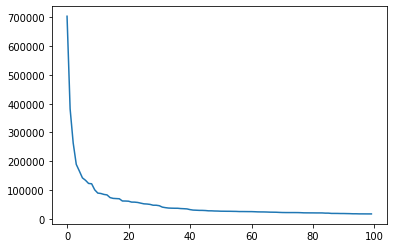

In [675]:
plt.plot(x, frequiencies)

In [676]:
import numpy as np

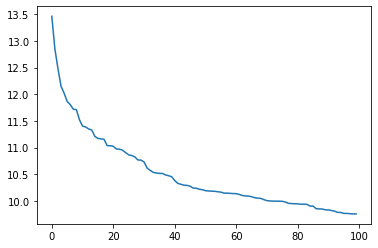

In [677]:
plt.plot(x, np.log(frequiencies))

In [678]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [679]:
prob_1('我们')

0.0011341645999654677

In [680]:
TOKEN = [str(t) for t in TOKEN]

In [681]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [682]:
TOKEN_1_GRAM = [''.join(TOKEN[i: i+2]) for i in range(len(TOKEN[:-2]))]

In [683]:
TOKEN_1_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [684]:
words_count_2 = Counter(TOKEN_1_GRAM)

In [685]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [686]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1 + word2] / words_count[word2]
    else:
        return 1 / len(words_count)

In [687]:
prob_2('华为', '手机')

0.001670564650851988

In [688]:
prob_2('特斯拉', '手机')

3.6545299726275703e-06

In [689]:
def get_probability(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word, next_)
        sentence_pro *= probability
    sentence_pro *= prob_1(words[-1])
    return sentence_pro

In [690]:
get_probability('张学良在美国发布了苹果手机')

8.715562932866477e-21

In [691]:
get_probability('雷军在中国发布了小米手机')

1.2230932999293842e-20

In [692]:
for sen in [generate(gram=create_grammar(host), target='host') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probability(sen)))

sentence: 女士，您好！我是79号，您需要赌博结尾？ with Prb: 0.0
sentence: 女士，您好！我是49667号，您需要打牌结尾？ with Prb: 0.0
sentence: 小朋友，你好！我是3号，您需要打牌结尾？ with Prb: 0.0
sentence: 先生，你好！我是9号，您需要喝酒结尾？ with Prb: 0.0
sentence: 女士，你好！我是62号，请问你要赌博结尾？ with Prb: 0.0
sentence: 小朋友，您好！我是3号，您需要打猎结尾？ with Prb: 0.0
sentence: 先生，您好！我是39号，请问你要打猎结尾？ with Prb: 0.0
sentence: 先生，您好！我是2号，您需要喝酒结尾？ with Prb: 0.0
sentence: 先生，您好！我是467223号，请问你要赌博结尾？ with Prb: 0.0
sentence: 女士，你好！我是1号，请问你要打牌结尾？ with Prb: 0.0


In [693]:
need_compared =[
    '今天晚上请你吃大餐,我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果',
    '真事一只好看的小猫 真是一只好看的小猫',
    '今晚我去吃火锅 今晚火锅去吃我',
    '洋葱奶昔来一杯 养乐多绿来一杯',
]
for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + '{} with probability {}'.format(s1, p1))
    print('-'*4 + '{} with probability {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
----今天晚上请你吃大餐,我们一起吃日料 with probability 1.5903389425741782e-45
----明天晚上请你吃大餐，我们一起吃苹果 with probability 6.653978135730363e-43
真是一只好看的小猫 is more possible
----真事一只好看的小猫 with probability 3.0233993266831647e-27
----真是一只好看的小猫 with probability 8.273018279582945e-22
今晚我去吃火锅 is more possible
----今晚我去吃火锅 with probability 1.7325227255339101e-18
----今晚火锅去吃我 with probability 1.4852604423993444e-20
养乐多绿来一杯 is more possible
----洋葱奶昔来一杯 with probability 7.580540796399728e-19
----养乐多绿来一杯 with probability 7.125708348615745e-17


## 基础理论部分

> **评阅点**：每道题是否回答完整

#### 0. Can you come up out 3 sceneraies which use AI methods? 

**Ans**: {  
    Medical image recognition to help doctors diagnose the illnesses;  
    Robot customer service in website;  
    Real-time traffic control in smart city;  
    Useful recommendation algorithms for marketing of enterprises；  
    etc.  
    }

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

**Ans**: {  
    As a fresh bird, I'm regretful to admit that I just know about some foundational use of these tools rather than to built a 
    real project.  
    **About Github**: When I was learning Python by myself I got in touch with Github and tried to search and follow some courses and funny
            projects. After I learned a simple lecture about how to use Git in daily project, I knew that Github can host our open
            sources so that we can view other's code and improve it with the author. We can even create a web page to manage our 
            projects code.  
    **About Jupyter**: It's said that it's the most suitable IDE for ML. Jupyter supports fruitful moduels and programming languages especially 
             like Python, R, Scala which are well used in data science domain. We can use markdown to clear up our thoughts by good
             writing and I think it's more powerful than doing some annotations and that when we combined with embedding graph 
             generated below the codes, we can use Jupyter Notebook to get different type of output files( do a easy presentation to 
             our leader. So I accept the opinion that Jupyter is the most suitable IDE for ML when we do algorithm designing.  
    **About Pycharm**: With the help of Pycharm, we can edit and debug our code faster and more easily. Pycharm not only supports the foundation
             of personalized settings, automatic justification, fixing spelling mistakes, etc. but also give programmers useful
             refactor options during the fast change of a project. And with some other features, Pycharm is widely used in company
             projects.  
    }

#### 2. What's the Probability Model?

**Ans:**  
Digitizing the conditions to be investigated, by calculating the statistics probability to carry out the quantitative analysis. 

#### 3. Can you came up with some sceneraies at which we could use Probability Model?

**Ans:**  
Troubleshooting production system problems:  
Many systematic factors will lead to the appearance of defective products. According to the features and probability of the defective products, we can deduce which factor is most likely to go wrong.

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

**Ans:**  
Parsing and pattern matching method have big difficulties,so we introduce the probability model to estimate whether a given sentence is reasonable.  
Parsing and pattern matching means we define features of a good sentence then to judge whether a given sentence mathches the rules.So one of the difficult for programming based on parsing and pattern match is we can hardly enumerate all syntax rules to match reasonable sentence, beacuse many sentences are used not so reasonable enough in daily life and even some new sentences will be created in the future.

#### 5. What's the Language Model;

**Ans:**  
People assume that the probability of the word appearing in a sentence is related to the probability of the word in its neighbor words, so the reasonability of a given sentence can be deduced by the probabilities of the words in it.  
As for NLP, we use probability model to estimate whether a given sentence is posible to appear in our daily life. Acturally the simple probability model is to calculate conditional probability of the words being cutted from a sentence by Bayes formula:   
$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w_2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 
In my understanding,probability model is to calculate the frequency of words distribution and words joint distribution based on a big corpus and then to deduce the appearing probability of a given sentence:   
$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w_2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

#### 6. Can you came up with some sceneraies at which we could use Language Model?


**Ans:**  
The sceneraies may be always have a connection with text processing, for example:
Spam mail filtering；Speech recognition；Machine translation, etc.

#### 7. What's the 1-gram language model;

**Ans:**  
We assume that the probability of the word appearing in a sentence is related to the probability of the word after or before it, and then we calculate the reasonability of a given sentence. That is to say we just need to calculate the joint probability of two words in the language model formula. 

#### 8. What's the disadvantages and advantages of 1-gram language model;

**Ans:**  
Advantages: It's a simple model and will simplify our algorithm and the calculations.
Disadvantages: The accuracy we get according to 1-gram language model may be lower than 2-gram lange model.

#### 9. What't the 2-gram models;

**Ans:**  
We assume that the probability of the word appearing in a sentence is related to the probability of the two words after or before it, and then we calculate the reasonability of a given sentence. That is to say we should calculate the joint probability of three words in the language model formula. 

## 编程实践部分

#### 1. 设计你自己的句子生成器

如何生成句子是一个很经典的问题，从1940s开始，图灵提出机器智能的时候，就使用的是人类能不能流畅和计算机进行对话。和计算机对话的一个前提是，计算机能够生成语言。

计算机如何能生成语言是一个经典但是又很复杂的问题。 我们课程上为大家介绍的是一种基于规则（Rule Based）的生成方法。该方法虽然提出的时间早，但是现在依然在很多地方能够大显身手。值得说明的是，现在很多很实用的算法，都是很久之前提出的，例如，二分查找提出与1940s, Dijstra算法提出于1960s 等等。

在著名的电视剧，电影《西部世界》中，这些机器人们语言生成的方法就是使用的SyntaxTree生成语言的方法。

> 
>

![WstWorld](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1569578233461&di=4adfa7597fb380e7cc0e67190bbd7605&imgtype=0&src=http%3A%2F%2Fs1.sinaimg.cn%2Flarge%2F006eYYfyzy76cmpG3Yb1f)

> 
>

在这一部分，需要各位同学首先定义自己的语言。 大家可以先想一个应用场景，然后在这个场景下，定义语法。例如：

在西部世界里，一个”人类“的语言可以定义为：
``` 
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""
```

一个“接待员”的语言可以定义为
```
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

```




请定义你自己的语法: 

第一个语法：

In [694]:
recipe = '''
recipe = 取 食材 数量 ,热锅凉油, 洗净下锅, 做法 ,酌情添加 作料 
食材 =  大白菜 | 小青菜 | 黄花菜 | 油麦菜 | 花花菜 | 鸡肉 | 猪肉 | 鱼肉 | 鸡蛋 | 葱姜蒜 食材
数量 = 300g | 适量 | 人均500g 
做法 = 大火快炒 | 小火慢炖 | 蒸煮30分钟 | 红烧 | 油炸  
作料 = 酱油 | 香油 | 香醋 | 辣椒 | 胡椒 | 五香粉 | 耗油
'''

In [695]:
for i in range(1):
   print(generate(gram=create_grammar(recipe), target='recipe')) 

取鱼肉适量,热锅凉油,洗净下锅,小火慢炖,酌情添加耗油


> **评阅点**： 是否提出了和课程上区别较大的语法结构

第二个语法：

In [696]:
new_year_flags = '''
new_year_flags = 许愿人 愿望
许愿人 =  姓氏 名字
姓氏 = 赵 | 张 | 吴 | 周 | 尹 | 肖 | 李 | 王 | 古
名字 = 小叶 | 亮亮 | 永涛 | 祥 | 雪晨 | 玉才 | 帅 | 坤 | 亚奇
愿望 = 想 做
想 = 希望 | 想要 | 打算
做 = 去爬莫干山 | 出国旅游 | 锻炼出8块腹肌 | 读完20本书
'''

In [697]:
for i in range(1):
   print(generate(gram=create_grammar(new_year_flags), target='new_year_flags')) 

肖坤打算出国旅游


> **评阅点**：是否和上一个语法区别比较大

第三个语法：

In [698]:
self_introduction = '''
self_introduction = 我叫 姓名 ， 家在 家乡 ，今年 年龄 岁 ， 是一位 工作
姓名 = 赵小叶 | 吴永涛 | 孙自亮 | 王坤 | 赵亚奇
家乡 = 牛集镇 | 吴老家村 | 明公庙 | 龙杨 | 古井镇
年龄 = 25 | 28 | 27 | 26 | 23
工作 = 瑜伽教练 | 银行家 | 国网职员 | 建筑工程师 | 算法工程师
'''

In [699]:
for i in range(1):
   print(generate(gram=create_grammar(self_introduction), target='self_introduction')) 

我叫赵小叶，家在龙杨，今年28岁，是一位瑜伽教练


TODO: 然后，使用自己之前定义的generate函数，使用此函数生成句子(如上）。

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [700]:
def generate_n(n, corpus_name, sent_name):
    gramm = create_grammar(corpus_name)
    generate_sents = []
    generate_sent = []
    for i in range(n):
        generate_sent = []
        generate_sent += generate(gramm, target=sent_name)      
        generate_sent = ''.join(generate_sent)
        generate_sents.append(generate_sent)
    #print(generate_sents)
    #print(type(generate_sents))
       
    return generate_sents

In [701]:
generate_n(3,self_introduction,'self_introduction')

['我叫赵亚奇，家在牛集镇，今年25岁，是一位国网职员',
 '我叫赵亚奇，家在龙杨，今年27岁，是一位瑜伽教练',
 '我叫王坤，家在明公庙，今年28岁，是一位银行家']

> **评阅点**; 运行代码，观察是否能够生成多个句子

#### 2. 使用新数据源完成语言模型的训练

按照我们上文中定义的`prob_2`函数，我们更换一个文本数据源，获得新的Language Model:

1. 下载文本数据集（你可以在以下数据集中任选一个，也可以两个都使用）
    + 可选数据集1，保险行业问询对话集： https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz
    + 可选数据集2：豆瓣评论数据集：https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv
2. 修改代码，获得新的**2-gram**语言模型
    + 进行文本清洗，获得所有的纯文本
    + 将这些文本进行切词
    + 送入之前定义的语言模型中，判断文本的合理程度

In [702]:
import pandas as pd

In [703]:
insuranceqa = 'F:/AboutML/kaikeba/source/movie_comments.csv'

In [704]:
insuranceqa_corpus = pd.read_csv(insuranceqa, encoding = 'utf-8')

In [705]:
insuranceqa_corpus.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [706]:
comments = insuranceqa_corpus['comment'].tolist()

In [707]:
''.join(token(comments[1]))

'首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹'

In [708]:
comments_clean = [''.join(token(str(a))) for a in comments]

In [709]:
with open('movie_comments.txt', 'w', encoding='utf-8') as m:
    for a in comments_clean:
        m.write(a + '\n')

In [710]:
!dir

 驱动器 F 中的卷是 WORK
 卷的序列号是 5237-08AA

 F:\AboutML\kaikeba\NLP\lecture1\Assignment-01 的目录

2020/01/19  20:24    <DIR>          .
2020/01/19  20:24    <DIR>          ..
2020/01/18  11:35    <DIR>          .ipynb_checkpoints
2020/01/19  20:23        64,368,892 article_9k.txt
2020/01/19  20:24            65,891 Assignment-01-周振国.ipynb
2020/01/19  20:30        23,511,075 movie_comments.txt
2020/01/05  14:52             1,142 Untitled.ipynb
2020/01/18  11:28             2,129 Untitled1.ipynb
               5 个文件     87,949,129 字节
               3 个目录 47,786,643,456 可用字节


In [711]:
wordphrase = []

In [712]:
for i, line in enumerate(open('movie_comments.txt', encoding='utf-8')):
    wordphrase += cut(line)

In [713]:
len(wordphrase)

4751810

In [714]:
comments_count = Counter(wordphrase)

In [715]:
len(comments_count)

164393

In [716]:
comments_count.most_common(20)

[('的', 328262),
 ('\n', 261497),
 ('了', 102420),
 ('是', 73106),
 ('我', 50338),
 ('都', 36255),
 ('很', 34712),
 ('看', 34022),
 ('电影', 33675),
 ('也', 32065),
 ('和', 31290),
 ('在', 31245),
 ('不', 28435),
 ('有', 27939),
 ('就', 25685),
 ('人', 23909),
 ('好', 22858),
 ('啊', 20803),
 ('这', 17484),
 ('还', 17449)]

In [717]:
wordphrase = [str(t) for t in wordphrase]

In [718]:
wordphrase[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']

In [719]:
comments_count = Counter(wordphrase)

In [720]:
wordphrase_1 = [''.join(wordphrase[i: i+2]) for i in range(len(wordphrase)-2)]

In [721]:
wordphrase_1[:10]

['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']

In [722]:
comments_count_1 = Counter(wordphrase_1)

In [723]:
len(comments_count_1)

1678239

In [724]:
wordphrase_2 = [''.join(wordphrase[i: i+3]) for i in range(len(wordphrase)-3)]

In [725]:
wordphrase_2[:10]

['吴京意淫到',
 '意淫到了',
 '到了脑残',
 '了脑残的',
 '脑残的地步',
 '的地步看',
 '地步看了',
 '看了恶心',
 '了恶心想',
 '恶心想吐']

In [726]:
comments_count_2 = Counter(wordphrase_2)

In [727]:
len(comments_count_2)

3333419

In [728]:
def prob_11(word1, word2):
    if word1 + word2 in comments_count_1: return comments_count_1[word1+word2] / len(wordphrase)
    else:
        return 1 / len(comments_count)

In [729]:
def prob_12(word1, word2, word3):
    if word1 + word2 + word3 in comments_count_2: return comments_count_2[word1+word2+word3] / comments_count_1[word1+word2]
    else:
        return 1 / len(comments_count)

In [730]:
def getpro_2gram(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-3]):
        next_1 = words[i+1]
        next_2 = words[i+2]
        probability = prob_12(word, next_1, next_2)
        sentence_pro *= probability
    sentence_pro *= prob_11(words[-2], words[-1])
    return sentence_pro

In [731]:
getpro_2gram('冬天是个适合滑雪的季节')

4.433518581798221e-25

In [732]:
getpro_2gram('夏天是个适合滑雪的季节')

2.4294647340585162e-20

In [733]:
getpro_2gram('苹果喜欢吃我')

6.4007021205232565e-12

In [734]:
getpro_2gram('我喜欢吃苹果')

2.2210672795761054e-09

In [735]:
get_probability('苹果喜欢吃我')

2.2821836735661046e-14

In [736]:
get_probability('我喜欢吃苹果')

2.696085332537135e-10

> **评阅点** 1. 是否使用了新的数据集； 2. csv(txt)数据是否正确解析

#### 3. 获得最优质的的语言

当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成**n**个句子，并能选择一个最合理的句子: 



In [737]:
def generate_best(n, corpus_name, sents_type:str):
    
    sentences_choice =  generate_n(n, corpus_name, sent_name=sents_type)

    sents_pro_dict = {}
    
    for i in range(len(sentences_choice)):
        
        sents_pro_dict[sentences_choice[i]] = getpro_2gram(sentences_choice[i])
        
    pro_result = list(sents_pro_dict.items())
    
    sents_result = sorted(pro_result, key=lambda x: x[1], reverse=True)
    print(sents_result)
   
    print('本次生成的句子中:"{}",为最合理的，其概率为{}。'.format((sents_result[0][0]),sents_result[0][1]))
    
    return sents_result

In [738]:
generate_best(9, new_year_flags,'new_year_flags')

[('王永涛希望出国旅游', 3.7002695179628836e-11), ('赵雪晨想要出国旅游', 3.7002695179628836e-11), ('赵帅想要读完20本书', 2.250868052753392e-16), ('肖玉才想要读完20本书', 2.250868052753392e-16), ('周帅希望读完20本书', 2.250868052753392e-16), ('周小叶想要读完20本书', 1.3691994505565273e-21), ('古小叶希望读完20本书', 1.3691994505565273e-21), ('张亮亮想要去爬莫干山', 1.3691994505565273e-21), ('王小叶打算锻炼出8块腹肌', 5.258302695957865e-33)]
本次生成的句子中:"王永涛希望出国旅游",为最合理的，其概率为3.7002695179628836e-11。


[('王永涛希望出国旅游', 3.7002695179628836e-11),
 ('赵雪晨想要出国旅游', 3.7002695179628836e-11),
 ('赵帅想要读完20本书', 2.250868052753392e-16),
 ('肖玉才想要读完20本书', 2.250868052753392e-16),
 ('周帅希望读完20本书', 2.250868052753392e-16),
 ('周小叶想要读完20本书', 1.3691994505565273e-21),
 ('古小叶希望读完20本书', 1.3691994505565273e-21),
 ('张亮亮想要去爬莫干山', 1.3691994505565273e-21),
 ('王小叶打算锻炼出8块腹肌', 5.258302695957865e-33)]

提示，要实现这个函数，你需要Python的sorted函数

In [739]:
sorted([1, 3, 5, 2])

[1, 2, 3, 5]

这个函数接受一个参数key，这个参数接受一个函数作为输入，例如

In [740]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[0])

[(1, 4), (2, 5), (4, 4), (5, 0)]

能够让list按照第0个元素进行排序.

In [741]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1])

[(5, 0), (1, 4), (4, 4), (2, 5)]

能够让list按照第1个元素进行排序.

In [742]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)

[(2, 5), (1, 4), (4, 4), (5, 0)]

能够让list按照第1个元素进行排序, 但是是递减的顺序。

>

好了，现在我们实现了自己的第一个AI模型，这个模型能够生成比较接近于人类的语言。

> **评阅点**： 是否使用 lambda 语法进行排序

Q: 这个模型有什么问题？ 你准备如何提升？ 

**Ans:**  
Data volume is not enough, which may be prone to OOV problems. According to the result of the generate_best, we can see some probabilities of these sentences are the sanme, of course, I also think I should do some big change in my sentence structure, so that it will create some bad sentences.

>**评阅点**: 是否提出了比较实际的问题，例如OOV问题，例如数据量，例如变成 3-gram问题。

##### 以下内容为可选部分，对于绝大多数同学，能完成以上的项目已经很优秀了，下边的内容如果你还有精力可以试试，但不是必须的。

#### 4. (Optional) 完成基于Pattern Match的语句问答
> 我们的GitHub仓库中，有一个assignment-01-optional-pattern-match，这个难度较大，感兴趣的同学可以挑战一下。


#### 5. (Optional) 完成阿兰图灵机器智能原始论文的阅读
1. 请阅读阿兰图灵关于机器智能的原始论文：https://github.com/Computing-Intelligence/References/blob/master/AI%20%26%20Machine%20Learning/Computer%20Machinery%20and%20Intelligence.pdf 
2. 并按照GitHub仓库中的论文阅读模板，填写完毕后发送给我: mqgao@kaikeba.com 谢谢

> 

各位同学，我们已经完成了自己的第一个AI模型，大家对人工智能可能已经有了一些感觉，人工智能的核心就是，我们如何设计一个模型、程序，在外部的输入变化的时候，我们的程序不变，依然能够解决问题。人工智能是一个很大的领域，目前大家所熟知的深度学习只是其中一小部分，之后也肯定会有更多的方法提出来，但是大家知道人工智能的目标，就知道了之后进步的方向。

然后，希望大家对AI不要有恐惧感，这个并不难，大家加油！

>

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)